# Lineare Regression
In diesem Notebook realisieren wir einige Beispiele für die Lineare Regression. Wir beginnen mit einem sehr einfachen Beispiel. Wir laden den Datensatz mit Daten über Autos, der u.a. den Verbrauch der Autos und deren Gewicht enthält.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/troescherw/datasets/master/autos.csv"
autos = pd.read_csv(url)
autos.head()




,Verbrauch,Leistung,Gewicht
0,11.20,82,1310
1,11.20,82,1437
2,10.32,69,1160
3,10.99,82,1607
4,12.58,130,1720


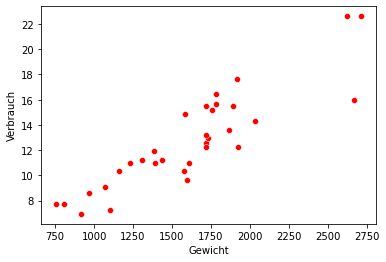

In [2]:
import seaborn as sns
_ = sns.scatterplot(data=autos, x="Gewicht", y="Verbrauch", color="red")

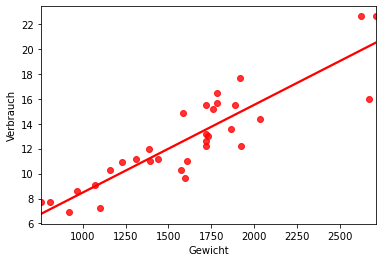

In [3]:
_=sns.regplot(data=autos, x="Gewicht", y="Verbrauch", color="red", ci=None)

In [4]:
import statsmodels.formula.api as smf
model = smf.ols("Verbrauch~Gewicht", data=autos).fit()

In [5]:
model.params

Intercept    1.454423
Gewicht      0.007026
dtype: float64

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Verbrauch   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           9.61e-12
Time:                        09:33:09   Log-Likelihood:                -63.029
No. Observations:                  32   AIC:                             130.1
Df Residuals:                      30   BIC:                             133.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4544      1.104      1.317      0.198      -0.801       3.709
Gewicht        0.0070      0.001     10.683      0.000       0.006       0.008
==============================================================================
Omnibus:                        0.938   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.948
Skew:                          -0.354   Prob(JB):                        0.623
Kurtosis:                       2.542   Cond. No.                     5.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Beispiel: Bierpreise auf dem Oktoberfest

In [7]:
url = "https://raw.githubusercontent.com/troescherw/datasets/master/oktoberfestbierpreis19852018.csv"
bierpreise = pd.read_csv(url)
bierpreise.tail()

,jahr,bier_preis
29,2014,9.98
30,2015,10.27
31,2016,10.57
32,2017,10.87
33,2018,11.30


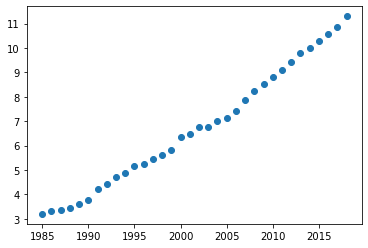

In [8]:
import matplotlib.pyplot as plt
plt.scatter(bierpreise.jahr, bierpreise.bier_preis)

In [9]:
model = smf.ols("bier_preis~jahr", data=bierpreise).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bier_preis   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3234.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.02e-33
Time:                        09:33:10   Log-Likelihood:               0.063952
No. Observations:                  34   AIC:                             3.872
Df Residuals:                      32   BIC:                             6.925
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -488.5857      8.710    -56.093      0.000    -506.328    -470.843
jahr           0.2475      0.004     56.866      0.000       0.239       0.256
==============================================================================
Omnibus:                        0.478   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.469
Skew:                           0.253   Prob(JB):                        0.791
Kurtosis:                       2.725   Cond. No.                     4.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dummy Kodierung
Bisher hatten wir nur numerische Variablen, genauer gesagt verhältnisskalierte Variablen wie zum Beispiel den Bierpreis, den Spritverbrauch eines Autos oder auch dessen Gewicht. *Verhältnisskaliert* bedeutet hier, dass es einen "echten" Nullpunkt gibt. Zumindest theortisch gibt es ein Auto mit 0 kg Gewicht, oder anders ausgedrückt: Ein Auto mit 2000kg ist doppelt so schwer wie ein Auto mit 1000 kg, man kann also Verhältnisse bilden.

Im folgenden Beispiel liegt uns nun ein Datensatz über Wohnungen vor, und zwar deren Mietpreise sowie die Größe der Wohnungen in Quadratmeter und die Lage der Wohnung. Wir sehen uns mal 10 zufällig ausgewählte Zeilen aus dem Datensatz an:

In [10]:
import pandas as pd
url = "https://raw.githubusercontent.com/troescherw/datasets/master/wohnungen.csv"
df = pd.read_csv(url, delimiter=";")
df.sample(10)

,Mietpreis,Quadratmeter,Lage
46,1050,50,Aussenbezirk
87,2200,111,Aussenbezirk
54,820,41,Aussenbezirk
66,1501,79,Umland
50,3520,180,Innenstadt
56,1206,67,Aussenbezirk
9,2750,96,Innenstadt
85,1200,52,Innenstadt
70,1400,39,Innenstadt
19,2032,127,Aussenbezirk


Wir erkennen, dass das Feature *Lage* nominalskaliert ist, also eine begrenzte Anzahl an vordefinierten Kategorien enthält (man sagt daher auch *Kategoriale Variable*). Es gibt folgende Kategorien:

* Innenstadt
* Aussenbezirk und
* Umland

Mit diesen Daten, die in Textform vorliegen, können wir nicht rechnen, also müssen wir diese Werte kodieren! Ein **Fehler** wäre es, zum Beispiel beliebige Zahlen zuzuweisen, wie z.B. Innenstadt = 1, Aussenbezirk = 2, Umland = 3, denn dadurch würden wir eine unbeabsichtigte Gewichtung der Kategorien vornehmen, was üblicherweise nicht gewollt ist. Würden wir den Kategorien andere Zahlen zuweisen, also z.B. Innenstadt = 3, dann käme auch ein anderes Modell heraus!

Stattdessen müssen wir eine sog. **Dummy-Kodierung** (auch als **One-Hot-Encoding** bezeichnet) durchführen. Dabei gilt grundsätzlich: Bei k Kategorien benötigen wir k-1 Kodierungen, hier also zum Beispiel:

| Innenstadt | Aussenbezirk |
|------------|--------------|
| 0          | 1            |
| 1          | 0            |

Die Kategorie *Umland* wäre somit mit 0, 0 kodiert! Dieses Vorgehen ist notwendig, damit wir keine linearen Abhängigkeiten zwischen den erhalten (es handelt sich schließlich um *unabhängige* Variablen!).

Im folgenden Code sorgt das "C" (vor "Categorical") in der Formel dafür, dass die angegebene Spalte automatisch nach diesem Prinzip kodiert wird.

In [11]:
import statsmodels.formula.api as smf

model = smf.ols("Mietpreis~Quadratmeter+C(Lage)", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mietpreis   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     527.5
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.73e-59
Time:                        09:33:10   Log-Likelihood:                -682.44
No. Observations:                 100   AIC:                             1373.
Df Residuals:                      96   BIC:                             1383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                34.5884     57.142      0.605      0.546     -78.837     148.014
C(Lage)[T.Innenstadt]   653.1795     52.528     12.435      0.000     548.913     757.446
C(Lage)[T.Umland]      -152.3866     60.274     -2.528      0.013    -272.029     -32.745
Quadratmeter             17.4891      0.489     35.755      0.000      16.518      18.460
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.328
Skew:                          -0.036   Prob(JB):                        0.849
Kurtosis:                       2.729   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wir erkennen an den Koeffizienten, dass nur die Lagen Innenstadt und Umland vorhanden sind. Die Kategorie Aussenbezirk wurde also automatisch entfernt und ist somit in $\beta_0$ eingeflossen.

Somit ergeben sich folgende Erkenntnisse:

* Mit jedem Quadratmeter mehr steigt der Mietpreis einer Wohnung in der Lage "Aussenbezirk" um ca. 17,50 Euro.
* Eine Wohnung im Umland ist gegenüber einer Wohnung im Aussenbezirk im Schnitt um 152 Euro günstiger.
* Eine Wohnung mit Innenstadtlage ist hingegen im Schnitt um ca. 653 Euro teurer als eine Wohnung im Aussenbezirk.

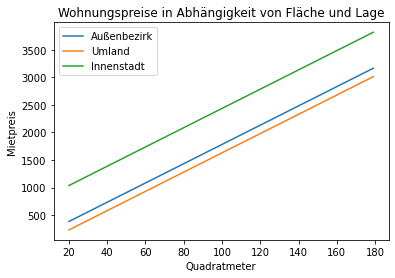

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

qm = np.arange(df.Quadratmeter.min(), df.Quadratmeter.max())
mieten_aussen = pd.DataFrame({"Quadratmeter":qm, "Lage":"Aussenbezirk"})
mieten_umland = pd.DataFrame({"Quadratmeter":qm, "Lage":"Umland"})
mieten_innen  = pd.DataFrame({"Quadratmeter":qm, "Lage":"Innenstadt"})

plt.plot(qm, model.predict(mieten_aussen), label="Außenbezirk")
plt.plot(qm, model.predict(mieten_umland), label="Umland")
plt.plot(qm, model.predict(mieten_innen), label="Innenstadt")
plt.legend()
plt.xlabel("Quadratmeter")
plt.ylabel("Mietpreis")
plt.title("Wohnungspreise in Abhängigkeit von Fläche und Lage")
plt.show()